# Алгоритмы анализа данных

## Урок 8. Снижение размерности данных

## <center> Практическое задание </center>

__Задание 1:__ Можно ли отобрать наиболее значимые признаки с помощью PCA?

## Для самостоятельной работы

1. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
2. (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.
3. (*) Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи.

по регрессии (https://www.kaggle.com/c/tutors-expected-math-exam-results)

или классификации (https://www.kaggle.com/c/choose-tutors).

Функция linalg.svd() выполняет сингулярное (SVD) разложение.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1:

- Можно ли отобрать наиболее значимые признаки с помощью PCA?

Опишем суть метода PCA в терминах преобразования линейного n-мерного пространства признаков, где n-количество признаков содержащихся в матрице признаков X нашей задачи.

Пусть имеется некоторе n-мерное пространство $S$, в котором определён n-мерный базис, состоящих из n базисных векторов $e_i, i=1,...,n$.

Для простоты и наглядности будем считать, что базис является ортонормированным, то есть $$e_i\cdot e_j=\delta_{ij}$$
Здесь $\delta_{ij}$ - дельта символ Кронекера
$$\delta_{ij}= \left\{_{0, i\neq j}^{1, i=j}\right.$$

Пусть вектор $X_k$ - n-мерный вектор нашего пространства признаков, проекции которого $x_i^k$ на базис $e_i$ и есть __строка нашей матрицы признаков $X$__, то есть набор значений признаков соответствующих $y_k$, конкретному k-му значению вектора значений $y$. В нашем базисе вектор $X_k$ можно записать как $$X_k=\sum_{i=1}^{n}x_i^k e_i$$.

Зафиксируем, что нашей матрице параметров $X$, в нашем n-мерном пространстве, соответствует некоторая n-мерная гиперплоскость $G$. Точками этой гиперплоскости являются точки заданные векторами $X_k$.

Вращением базиса $e_i$  в пространстве $S$ и смещением начала координат, мы можем перейти в новый ортонормированнй базис $e'_i$.

При этом каждый базисный вектор новой системы координат, может быть выражен как линейная комбинация базисных векторов старой системы координат
$$e'_i=\sum_{j=1}^{n}a_{ij} e_j$$
и наоборот, каждый базисный вектор старой системы координат, может быть выражен как линейная комбинация базисных векторов новой системы координат
$$e_i=\sum_{j=1}^{n}{a'}_{ij} e'_j$$.

Матрицы перехода между базисами А и А' связаны между собой $AA'=I$, где $I$ единичная матрица.

Каждый n-мерный вектор нашего пространства $X_k$, в новом базисе вектор $X_k$ можно записать как $$X_k=\sum_{i=1}^{n} {x'}_i^k {e'}_i$$
где ${x'}_i^k$ - координаты вектора $X_k$ в новой системе координат.

Можно выбрать такой базис, что часть базисных векторов новой системы координат окажутся "ортогональными" нашей n-мерной гиперплоскости параметров $G$. Пусть количество таких веторов равно $m$. 

Под "ортогональнальностью" мы будем понимать, то что проекция (оценивается дисперсией) вектора параметров $X_k$ будет равна 0 или близка к нему, то есть ${x'}_s^k\approx 0$ для некоторых m номеров из набора n.


Соответственно, в этом случае, в новом базисе $e'$ мы можем __перейти от n-мерного пространства, к подпространству размерности $n-m < n$__, так как 

$$X_k=\sum_{i=1}^{n-m} {x'}_i^k {e'}_i + \sum_{i=m}^{n} {x'}_i^k {e'}_i=\sum_{i=1}^{n-m} {x'}_i^k {e'}_i$$
где $${x'}_i^k\approx 0, i = m,...,n$$ и следовательно пологаем $$\sum_{i=m}^{n} {x'}_i^k {e'}_i=0$$

То есть сделать именно то, что нам необходимо, понизить размерность до n-m.

В этом как я понимаю и заключается смысл метода главных компонент PCA.

__Вывод__

Как показали наши рассуждения, метод PCA не выявляет наиболее значимые признаки, а позволяет понизить размерность переходом к новому базису и затем переходу к подпрастранству меньшей размерности, без значительной потери качества модели.

# Задание 1. (*):

- Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# Загрузим датасет из sklearn
iris = datasets.load_iris()
X = iris.data

print(X[:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [5]:
print(type(X_))
print(X_[:5, :])

<class 'numpy.ndarray'>
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Найдём матрицы $U, V, D$
- $U$ - матрица собственных векторов матрицы $XX^T$.<br>
- $V$ - матрица собственных векторов матрицы $X^TX$.<br>
- $D$ - диагональная матрица собственных значений матриц $XX^{T}$ и $X^{T}X$ (они равны и также называются сингулярными числами матрицы $X$)

In [6]:
# U, D, V_t = np.linalg.svd(A)
U, D, V_t = np.linalg.svd(X_, full_matrices=False)
U[:5, :]

array([[-0.10823953, -0.0409958 ,  0.02721865,  0.01371065],
       [-0.09945776,  0.05757315,  0.0500034 ,  0.05843586],
       [-0.1129963 ,  0.02920003, -0.00942089,  0.01609833],
       [-0.1098971 ,  0.05101939, -0.01945713, -0.03741666],
       [-0.11422046, -0.0552418 , -0.00335436, -0.02037905]])

In [7]:
D

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [8]:
# Преобразование матрицы столбцов или строк в диагональную матрицу
np.diag(D)

array([[20.92306556,  0.        ,  0.        ,  0.        ],
       [ 0.        , 11.7091661 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.69185798,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.76273239]])

In [9]:
V_t[:5, :]

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [10]:
# Получим исходную матрицу параметров
s = np.dot(U, np.diag(D))
X_s = np.dot(s, V_t)
X_s[:5, :]

# Видно, что X_s = X

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [11]:
print(V_t.shape)

(4, 4)


In [12]:
print('Собственные значения в порядке убывания:')
# eig_pairs[0] или eig_values
for i in D:
    print(i)

Собственные значения в порядке убывания:
20.923065561236466
11.709166098412418
4.691857983325718
1.7627323858977804


Оценим долю дисперсии, которая описывается найденными компонентами.

In [13]:
D_sum = sum(D)
# print(D_sum)

var_exp = [(i / D_sum) * 100 for i in sorted(D, reverse=True)]
# print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[53.52971788236241, 29.95681278402008, 12.003682417209488, 4.509786916408036]
Кумулятивная доля дисперсии по компонентам 
[ 53.52971788  83.48653067  95.49021308 100.        ]


Таким образом, первая главная компонента описывает 53.5% информации, первые две в сумме - 83.5%, первые три в сумме - 95.5%. В то же время последняя компонента описывает всего 4.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последнюю компоненту, оставив первые три.

In [14]:
# Сформируем вектор весов из собственных векторов, соответствующих первым трём главным компонентам
W = V_t[0:V_t.shape[0], 0:3].copy()
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.26934744  0.5804131 ]
 [-0.37741762 -0.92329566 -0.02449161]
 [ 0.71956635 -0.24438178 -0.14212637]
 [ 0.26128628 -0.12350962 -0.80144925]]


In [15]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)
# Выведим 5 верхних строк матрицы Z
Z[:5, :]

array([[-2.16199391, -0.20824916,  0.69701917],
       [-1.85386523,  0.91972173,  0.58455377],
       [-2.19479706,  0.57380492,  0.44070126],
       [-2.08925659,  0.79120079,  0.35985553],
       [-2.31201067, -0.38815258,  0.62105386]])

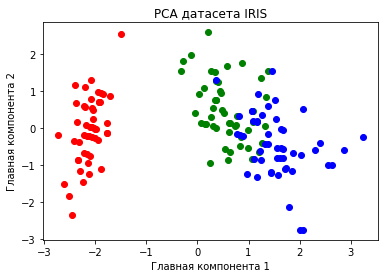

In [16]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, используя метод главных компонент (PCA), мы перешли от четырехмерного пространства признаков к трёхмерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

# Задание 2. (*):

- Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

### 2.1 Обучаем модель классификации на датасете IRIS без применения PCA 

In [17]:
# Используем загруженный и отмасштабированнй в задании 1.(*) датасет IRIS, к которому не применялся PCA

# Отобразим первые 5 сторк датасета
print(X_[:5, :])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Разделим выборку на обучающую и тестовую

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=1)

### Визуализация

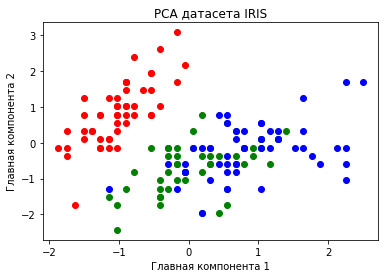

In [19]:
### Визуализация (вариант 1)
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_[y==i, 0], X_[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

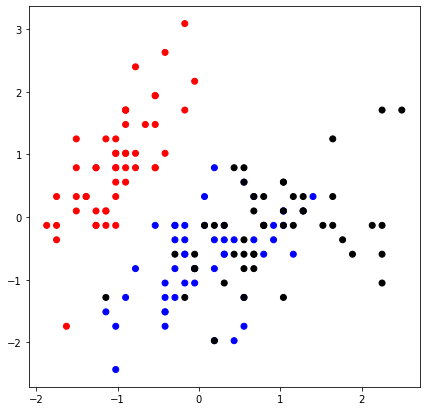

In [20]:
# Визуализация  (вариант 2)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'black'])
plt.figure(figsize=(7, 7))
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [21]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [22]:
def knn(x_train, y_train, x_test, k):
    # Базовый алгоритм (вариант из методички), без взвешивания.
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Функция для вычисления точности

In [23]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [24]:
def get_graph(X_train, y_train, k, q: 0.1, algorism):
    """
    Строим график распределения классов.
    
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#FFAA00'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    if algorism == 0:
        # Без взвешивания
        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    if algorism == 1:    
        # Взвешивание по индексам
        Z = knn_wi(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)
    if algorism == 2:
        # Взвешивание по расстоянию
        Z = knn_wn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Проверим работу алгоритма при k=5

In [25]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
#print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test)}')

Точность алгоритма при k = 5: 0.9666666666666667


Построим график распределения классов.

<ipython-input-24-ddb2c92b3541>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


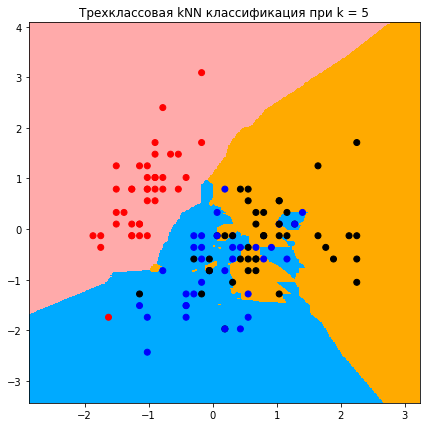

In [26]:
algorism = 0
q = 0.5
get_graph(X_train, y_train, k, q, algorism)

### 2.2 Обучаем модель классификации на датасете IRIS с применением PCA 

In [27]:
# Используем загруженный и отмасштабированный в задании 1.(*) датасет Z, полученный из X_ применением метода PCA
print(Z[:5, :])

[[-2.16199391 -0.20824916  0.69701917]
 [-1.85386523  0.91972173  0.58455377]
 [-2.19479706  0.57380492  0.44070126]
 [-2.08925659  0.79120079  0.35985553]
 [-2.31201067 -0.38815258  0.62105386]]


### 1-вариант: используем 3 параметра вместо 4

In [28]:
Z_ = Z[0:Z.shape[0], 0:3]

# Отобразим первые 5 сторк датасета
print(Z_[:5, :])

[[-2.16199391 -0.20824916  0.69701917]
 [-1.85386523  0.91972173  0.58455377]
 [-2.19479706  0.57380492  0.44070126]
 [-2.08925659  0.79120079  0.35985553]
 [-2.31201067 -0.38815258  0.62105386]]


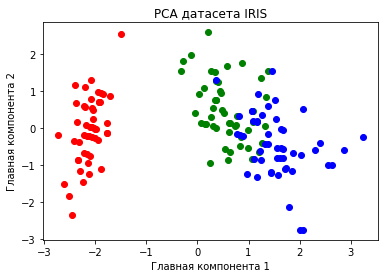

In [29]:
# Визуализация
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z_[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Разделим выборку на обучающую и тестовую

In [30]:
Z_train, Z_test, y_train, y_test = train_test_split(Z_, y, test_size=0.2, random_state=1)

Проверим работу алгоритма при k=5

In [31]:
k = 5
y_pred = knn(Z_train, y_train, Z_test, k)
#print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test)}')

Точность алгоритма при k = 5: 0.9666666666666667


Построим график распределения классов.

<ipython-input-24-ddb2c92b3541>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


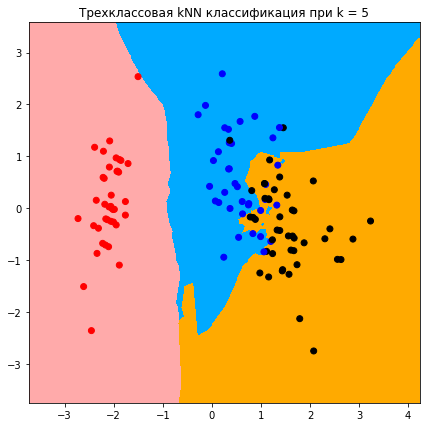

In [32]:
algorism = 0
q = 0.5
get_graph(Z_train, y_train, k, q, algorism)

### 2-вариант: используем 2 параметра вместо 4

In [33]:
# Используем загруженный и отмасштабированный в задании 1.(*) датасет Z, полученный из X_ применением метода PCA
Z_ = Z[0:Z.shape[0], 0:2]

# Отобразим первые 5 сторк датасета
print(Z_[:5, :])

[[-2.16199391 -0.20824916]
 [-1.85386523  0.91972173]
 [-2.19479706  0.57380492]
 [-2.08925659  0.79120079]
 [-2.31201067 -0.38815258]]


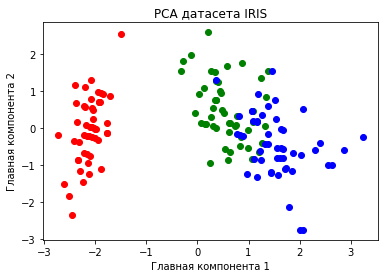

In [34]:
# Визуализация
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z_[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [35]:
# # Визуализация
# cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'black'])
# plt.figure(figsize=(7, 7))
# plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap=cmap)

Разделим выборку на обучающую и тестовую

In [36]:
Z_train, Z_test, y_train, y_test = train_test_split(Z_, y, test_size=0.2, random_state=1)

Проверим работу алгоритма при k=5

In [37]:
k = 5
y_pred = knn(Z_train, y_train, Z_test, k)
#print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test)}')

Точность алгоритма при k = 5: 0.9333333333333333


Построим график распределения классов.

<ipython-input-24-ddb2c92b3541>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


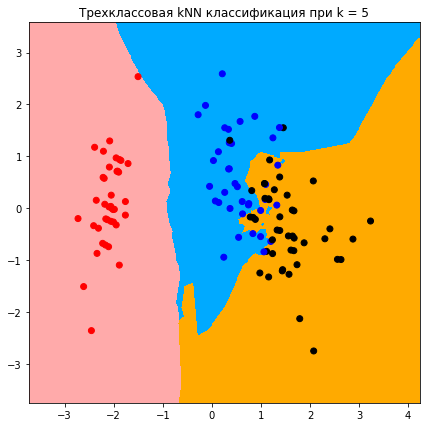

In [38]:
algorism = 0
q = 0.5
get_graph(Z_train, y_train, k, q, algorism)

### 2.3  Сравнить качество классификации по отложенной выборке.

Количество ближайших соседей k = 5

__1__ _Модель классификации на датасете IRIS без применения PCA_ (в модели использованы 4 параметра)

    Точность алгоритма при k = 5: 0.9666666666666667
    
__2__ _Модель классификации на датасете IRIS с применением PCA_ (в модели использованы 3 параметра)

    Точность алгоритма при k = 5: 0.9666666666666667
    
__3__ _Модель классификации на датасете IRIS с применением PCA_ (в модели использованы 2 параметра)

    Точность алгоритма при k = 5: 0.9333333333333333

__Вывод__

Для данного конкретного датасета, точность 1 и 2 случаев оказалась одинакова.
При этом во втором случае количество параметров меньше (3 вместо 4).
Это говорит о том, что уменьшение размерности не повлияло на качество нашей модели.

Для данного конкретного датасета, точность 1 и 3 случаев оказалась разная.
Для третьего случая она оказалась ниже чем в первом, но всё ещё высокая. При этом количество используемых параметров в третьем случае равно 2, в то время как в первом 4 (2 вместо 4).

Таким образом даже мы видим, что даже при использовании двух параметров с использованием метода PCA, классификация возможна.

При этом визуальное разделение на классы в случае использования метода PCA, более качественно (см. графики распределения классов).